In [1]:
from pathlib import Path
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
COLOR_MAP_NAME = 'cmc_batlows'

# Import module

In [2]:
from context import CL61_module as mCL61

# Open datasets

In [3]:
#ceil_path = str(Path(r'C:\Users\gezas\Documents\CL61\Data'))      ## My portable PC
#ceil_path = str(Path(r'D:\gezas\switchdrive\Private\CL61\Data'))  ## MY FIX PC
ceil_path = str(Path(r'D:\CL61\Data'))                             # USB Key

In [ ]:
start_data = '2023-02-05 00:00:00'
end_data = '2023-02-07 00:00:00'

februar06 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime=start_data, end_datetime=end_data)
# to open 2days of data it takes : 1m10s

In [4]:
#june18 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime="2023-07-18 00:00:00", end_datetime="2023-07-19 00:00:00")
june18 =  mCL61.CL61Processor(folder_path='../Data', specific_filename='cl61_20230718.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


In [5]:
march19 = mCL61.CL61Processor(folder_path='../Data_daily', specific_filename='cl61_20230319.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


In [5]:
# Or from a specific netcdf file (quicker) 
februar04 = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_20230204.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


In [10]:
februar03 = mCL61.CL61Processor(folder_path='../Data_daily', specific_filename='cl61_20230203.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


In [3]:
# Access archives
data_folder = r"Y:\archive\GreenFjord\2023\DATA_RAW\CL61"
first_date = "2023-06-27 00:00:00"
last_date = "2023-06-29 23:59:00"
june = mCL61.CL61Processor(folder_path=data_folder, start_datetime=first_date, end_datetime=last_date)

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


100%|██████████| 859/859 [07:55<00:00,  1.81it/s]


In [ ]:
june28 = june.get_subset(start_time="2023-06-28 00:00:00", end_time="2023-06-28 23:59:00")

# Save to compacted file for improved following usages

In [11]:
june18.dataset.to_netcdf(r"../Data/cl61_20230718.nc")
# took 1m30 from usb to pc

In [10]:
februar04.dataset.to_netcdf(r"../Data/cl61_20230204.nc")

# Plot basic colormesh of raw data

saved element to ..\Outputs\2023-07-17_colormesh


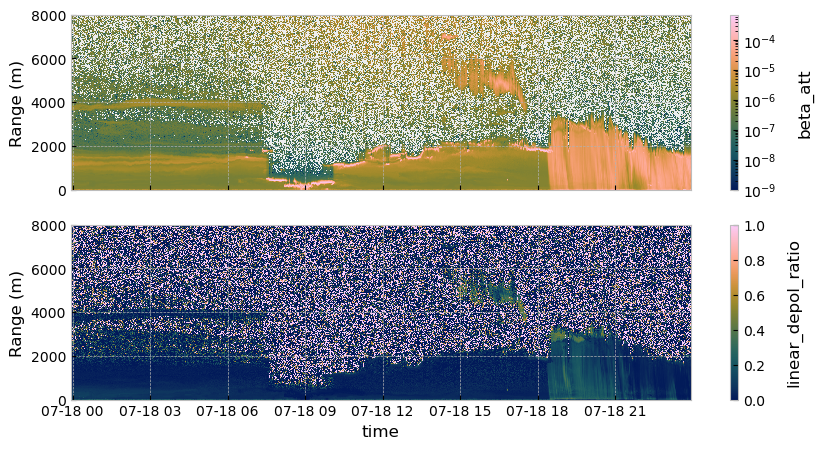

In [27]:
june18.plot.colormesh(range_limits= [0,8000], save_fig=True)

saved element to ..\Outputs\2023-02-04_colormesh


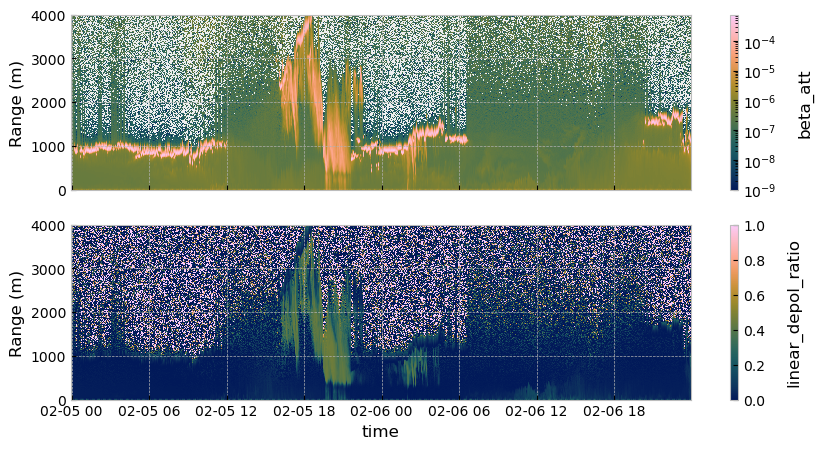

In [19]:
februar06.plot.colormesh(range_limits=[0,4000], save_fig=True)

saved element to ..\Outputs\2023-02-03_colormesh


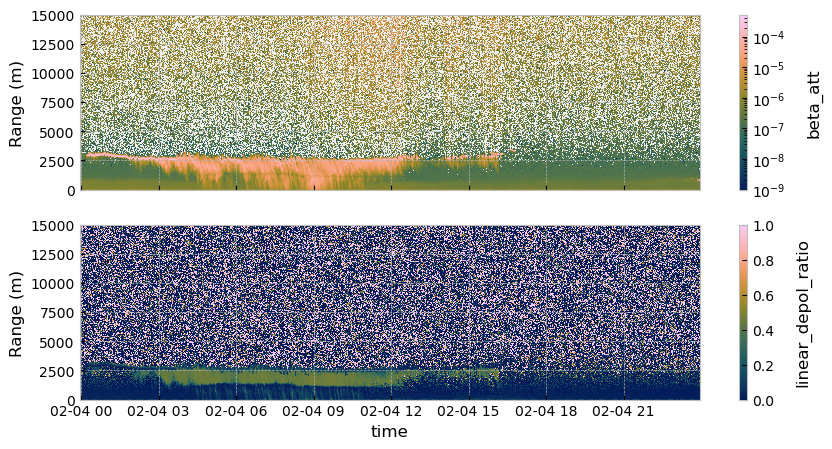

In [51]:
februar04.plot.colormesh(range_limits=[0,15000], save_fig=True)

# Filter out noisy part

In [6]:
june18.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


In [7]:
februar04.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


# Visualize results without noise

saved element to ..\Outputs\2023-07-17_colormesh


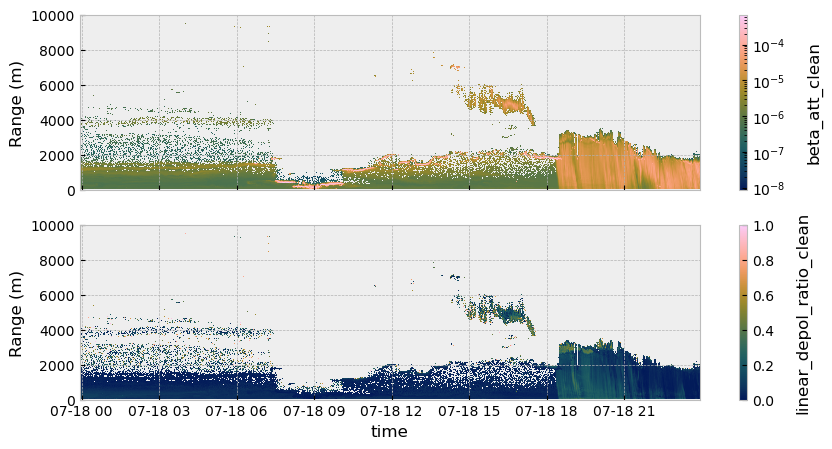

In [20]:
june18.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,10000], save_fig=True)

saved element to ..\Outputs\2023-02-04_colormesh


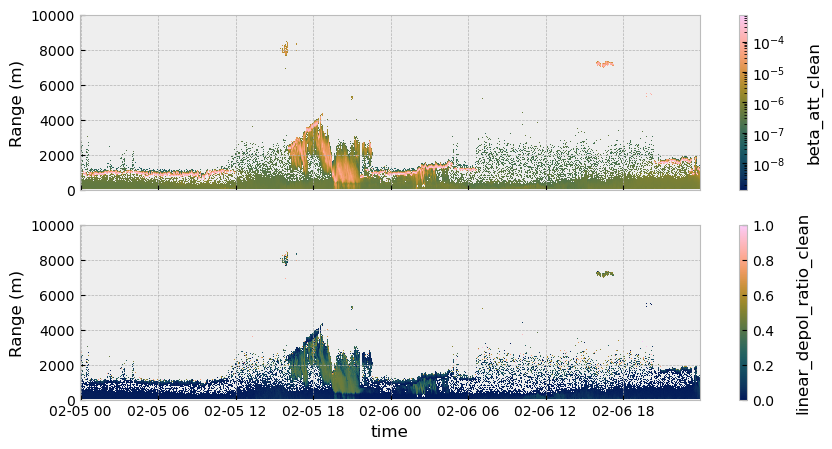

In [21]:
februar06.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,10000], save_fig=True)

saved element to ..\Outputs\2023-02-02_colormesh


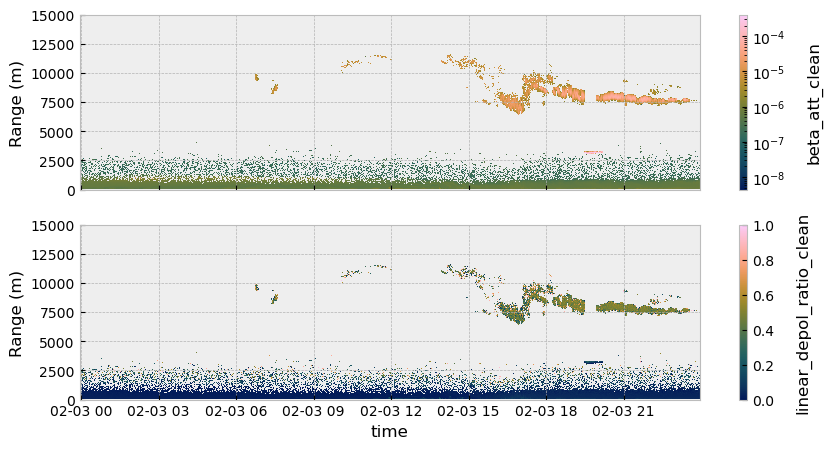

In [16]:
februar03.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,15000])

saved element to ..\Outputs\2023-02-03_colormesh


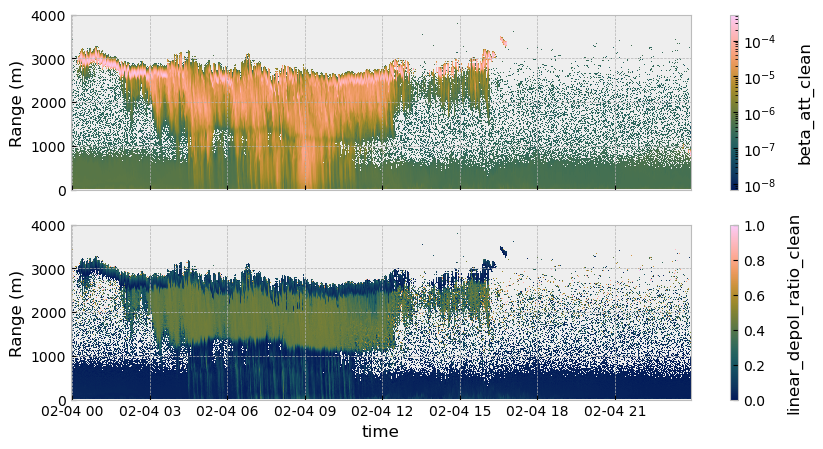

In [26]:
februar04.plot.colormesh(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,4000], save_fig=True)

# Visualize as profiles

In [54]:
from CL61_module import visualization
import matplotlib.pyplot as plt

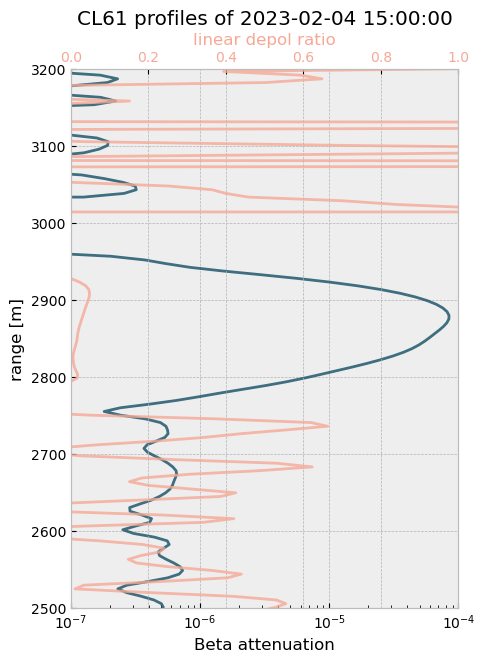

In [72]:
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = visualization.plotVerticalProfiles(februar04.dataset, time_period="2023-02-04 15:00:00", range_limits=[2500,3200], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax)
plt.title("CL61 profiles of 2023-02-04 15:00:00")
plt.savefig("feb04_15h_vprofiles_noisy_5km.png", dpi=300)

[<Axes: xlabel='Beta attenuation', ylabel='range [m]'>,
 <Axes: title={'center': 'CL61 profiles'}, xlabel='linear depol ratio'>]

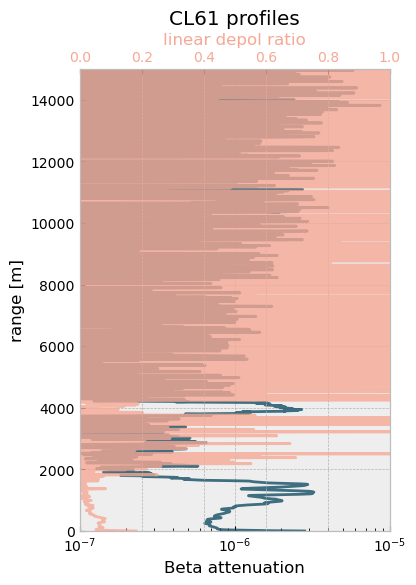

In [47]:
visualization.plotVerticalProfiles(june18.dataset, time_period="2023-07-18 03:00:00", var_xlims=[[1e-7, 1e-4], [0,1]])

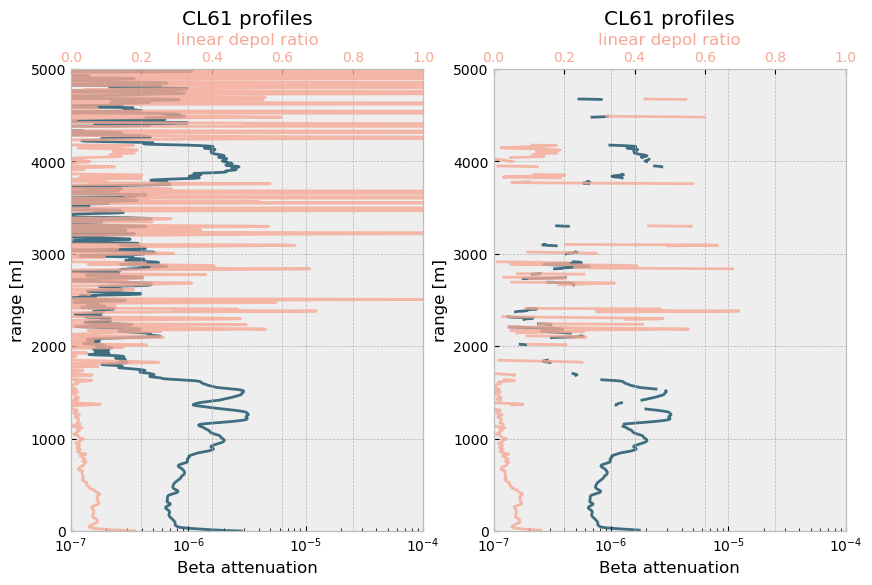

array([<Axes: xlabel='Beta attenuation', ylabel='range [m]'>,
       <Axes: xlabel='Beta attenuation', ylabel='range [m]'>],
      dtype=object)

In [38]:
june18.plot.compare_profiles(time_period="2023-07-18 03:00:00", comparison='variable', range_limits=[0,5000])

In [ ]:
februar04.plot.vertical_profiles(time_of_interest=["2023-04-02 17:30:00"],
                             var_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                             label_first_profile='beta att clean',
                             label_second_profile= 'linear depol ratio clean',
                             range_limits=[0, 15000],
                             x_scales=['log', 'lin'])

saved element to ..\Outputs\2023-02-04_comp_profiles


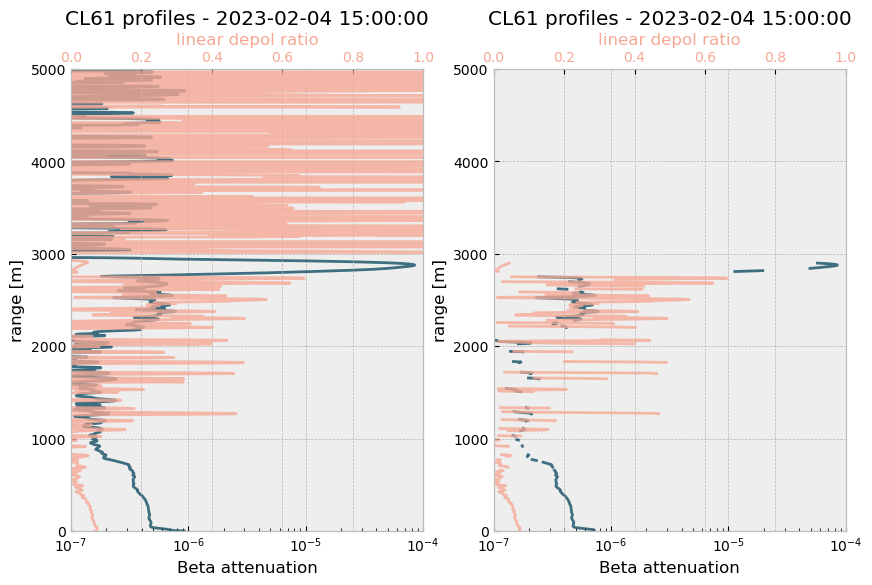

array([<Axes: xlabel='Beta attenuation', ylabel='range [m]'>,
       <Axes: xlabel='Beta attenuation', ylabel='range [m]'>],
      dtype=object)

In [6]:
februar04.plot.compare_profiles(time_period= "2023-02-04 15:00:00", comparison='variable', range_limits=[0,5000])

# Classify

## K-mean classificitaiton

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


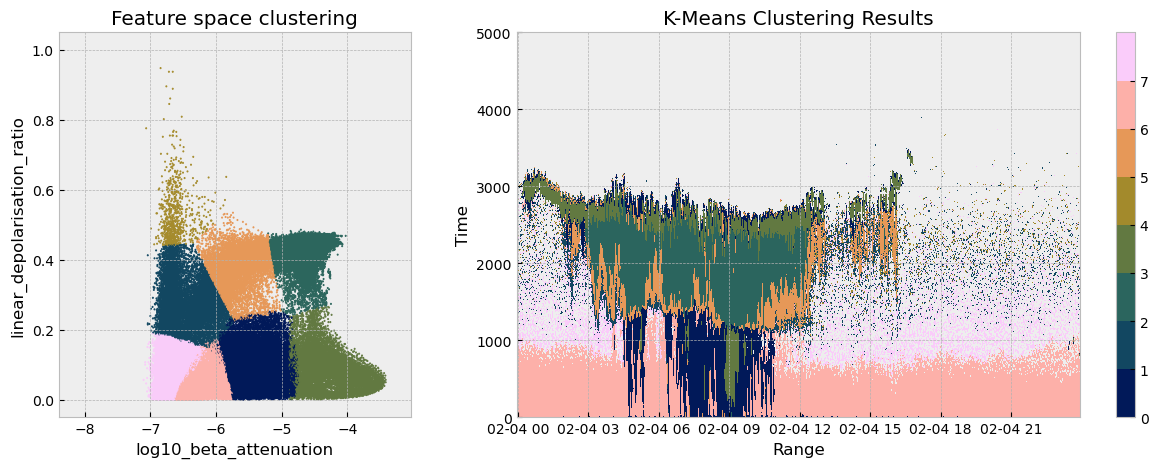

saving results under followingkmean_clusters


In [8]:
februar04.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_number = 8,
                                        plot_result = True,
                                        kmean_method = 'random')

In [9]:
from CL61_module import classification_vizalization
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc 

feature1_flatten = np.log10(februar04.dataset['beta_att_clean'].values.flatten())
feature2_flatten = februar04.dataset['linear_depol_ratio_clean'].values.flatten()
cluster_labels_flatten = februar04.dataset['kmean_clusters'].values.flatten()

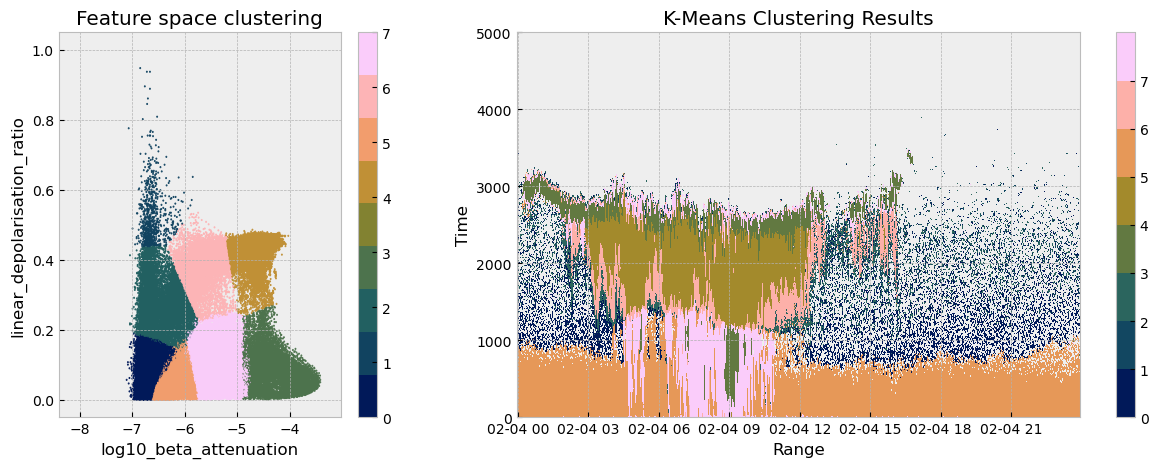

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize = (15,5), width_ratios=[1, 2])
fig, axes[0] = classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten,
                                                    fig = fig,
                                                    ax = axes[0])

fig, axes[1] = classification_vizalization.visualize_Kmean_results(februar04.dataset,
                                    februar04.dataset['kmean_clusters'].T,
                                    num_categories=8,
                                    fig = fig,
                                    ax = axes[1])
    
plt.savefig('../Outputs/feb04_kmeans_N8_range025.jpg', dpi=300)

plt.show()

In [13]:
februar04.process.classify_clusters()

Loading config file at ../CL61_module/config_classification.yml 
 Successful cluster classification stored in dataset under classified_clusters


Loading config file at ../CL61_module/config_classification.yml 


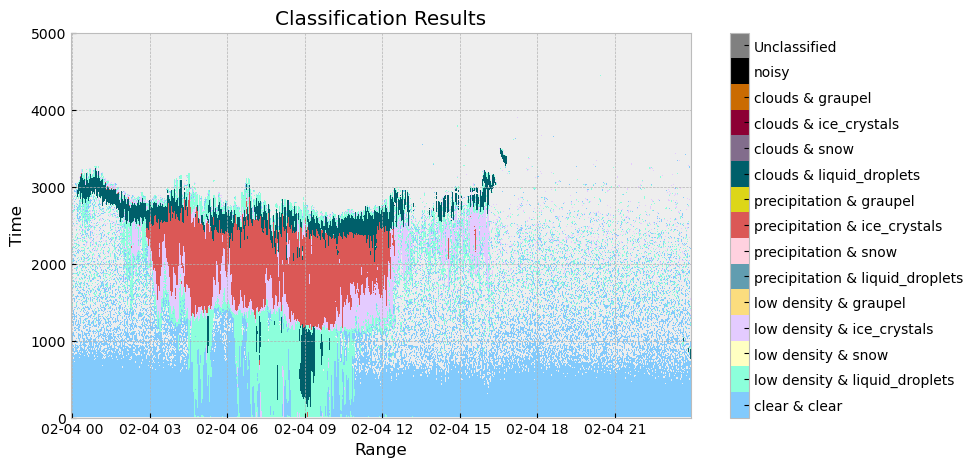

In [14]:
februar04.plot.plot_classes_colormesh()

In [15]:
februar04.process.classify_elementwise()

Loading config file at ../CL61_module/config_classification.yml 
 Successful pixel-wise classification stored in dataset under classified_elements


Loading config file at ../CL61_module/config_classification.yml 


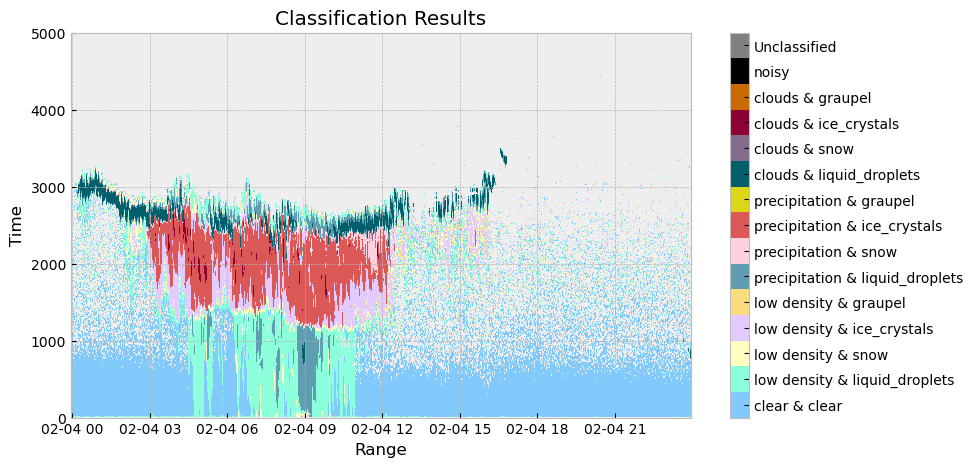

In [16]:
februar04.plot.plot_classes_colormesh(variable_classified="classified_elements")

Loading config file at ../CL61_module/config_classification.yml 
new figure


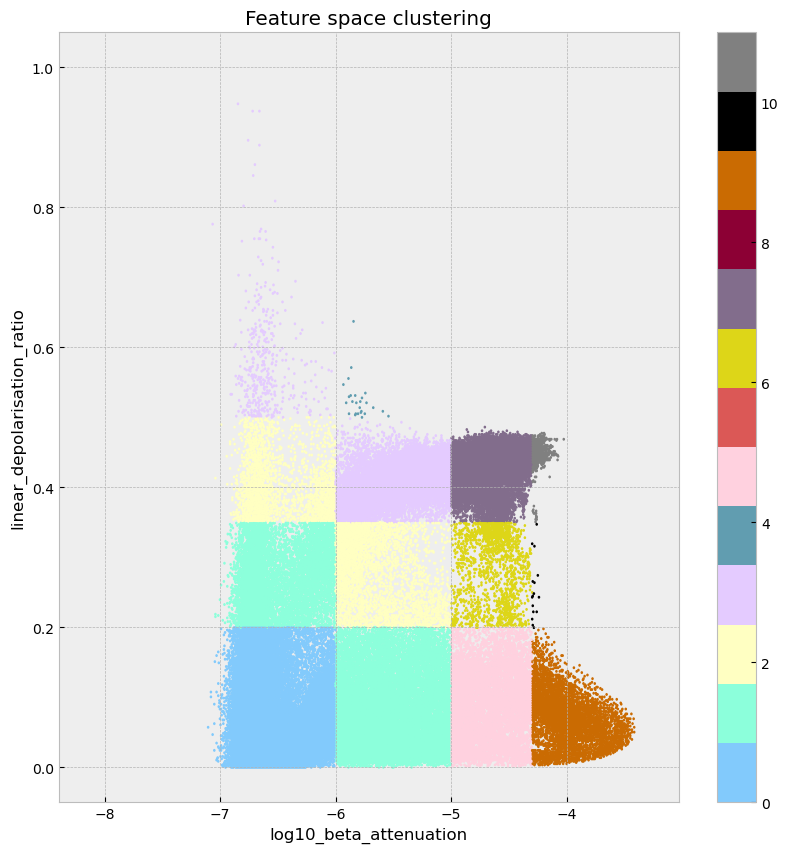

(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': 'Feature space clustering'}, xlabel='log10_beta_attenuation', ylabel='linear_depolarisation_ratio'>)

In [23]:
from matplotlib.colors import ListedColormap
import yaml

def load_config(filepath='../CL61_module/config_classification.yml'):
    print(f'Loading config file at {filepath} ')
    with open(filepath, 'r') as file:
        if file is None:
            raise TypeError('File not found at given filepath')
        config_classification = yaml.safe_load(file)
    return config_classification

cluster_labels_flatten = februar04.dataset['classified_elements'].values.flatten()

config_classification = load_config()
category_colors = config_classification['category_colors']
classification_cmap = ListedColormap(category_colors)

class_combination_mapping = config_classification['class_combination_mapping']
num_categories = len(class_combination_mapping)

classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten, cmap=classification_cmap)

# Same but june18

saved element to ..\Outputs\2023-07-17_hist2D


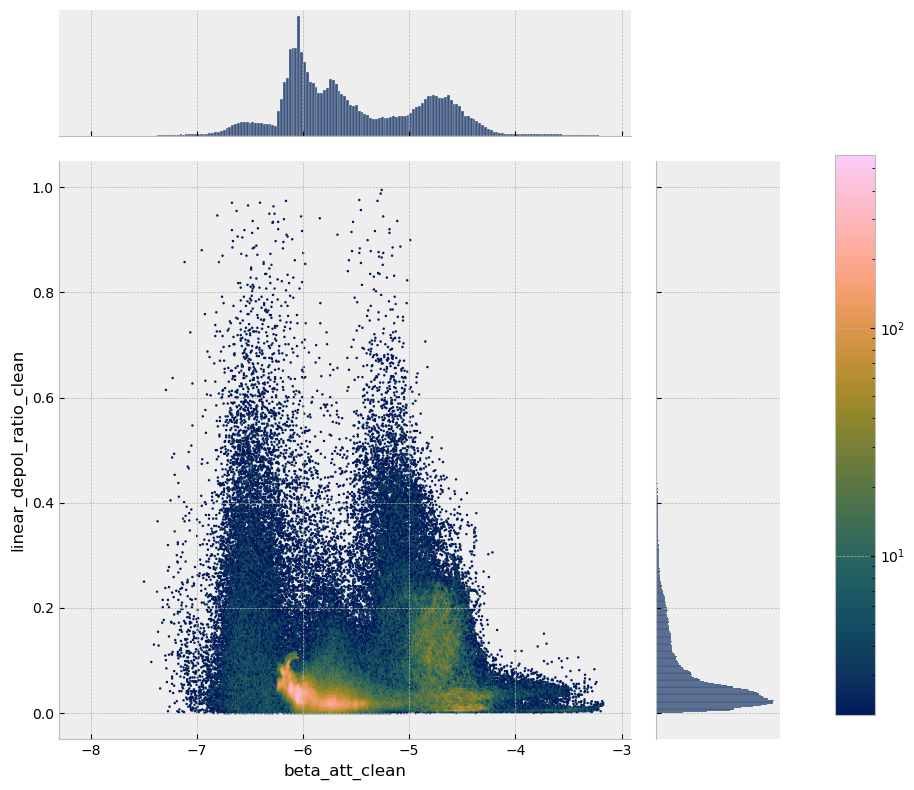

In [10]:
june18.plot.plot_histogram()

(4717440, 3)
Scaler means: [-5.52556205e+00  9.73955575e-02  1.39403290e+03]  
 and scales: [6.76281825e-01 1.25925978e-01 1.28124972e+03]


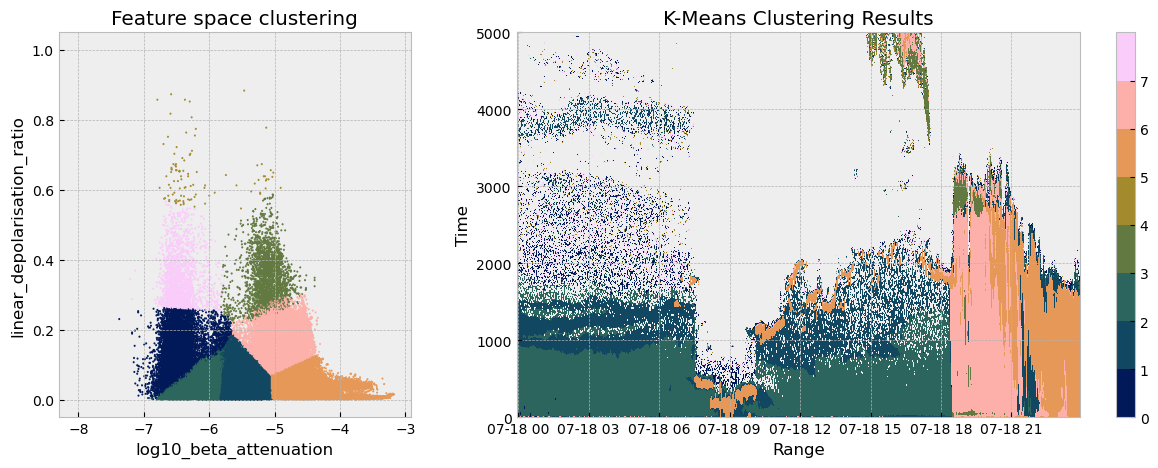

saving results under followingkmean_clusters


In [9]:
# Get data folder
june18.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_number = 8,
                                        plot_result = True,
                                        kmean_method = 'random')

In [14]:
from CL61_module import classification_vizalization
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc 

feature1_flatten = np.log10(june18.dataset['beta_att_clean'].values.flatten())
feature2_flatten = june18.dataset['linear_depol_ratio_clean'].values.flatten()
cluster_labels_flatten = june18.dataset['kmean_clusters'].values.flatten()

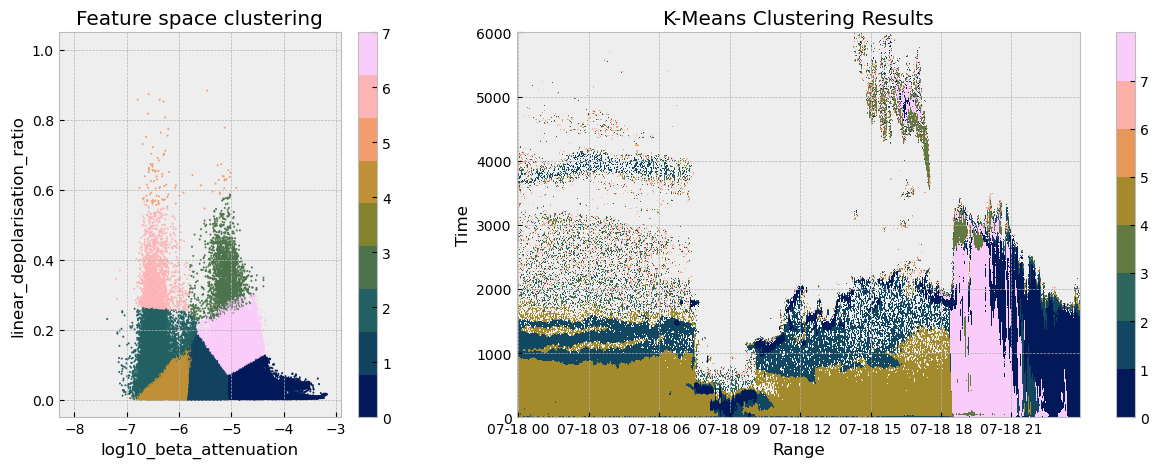

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize = (15,5), width_ratios=[1, 2])
fig, axes[0] = classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten,
                                                    fig = fig,
                                                    ax = axes[0])

axes[1], fig = classification_vizalization.visualize_Kmean_results(june18.dataset,
                                    june18.dataset['kmean_clusters'].T,
                                    num_categories=8,
                                    fig = fig,
                                    ax = axes[1])
axes[1].set_ylim([0,6000])
    
plt.savefig('../Outputs/june18_kmeans_N8_range025.jpg', dpi=300)


Loading config file at ../CL61_module/config_classification.yml 
 Successful cluster classification stored in dataset under classified_clusters
Loading config file at ../CL61_module/config_classification.yml 


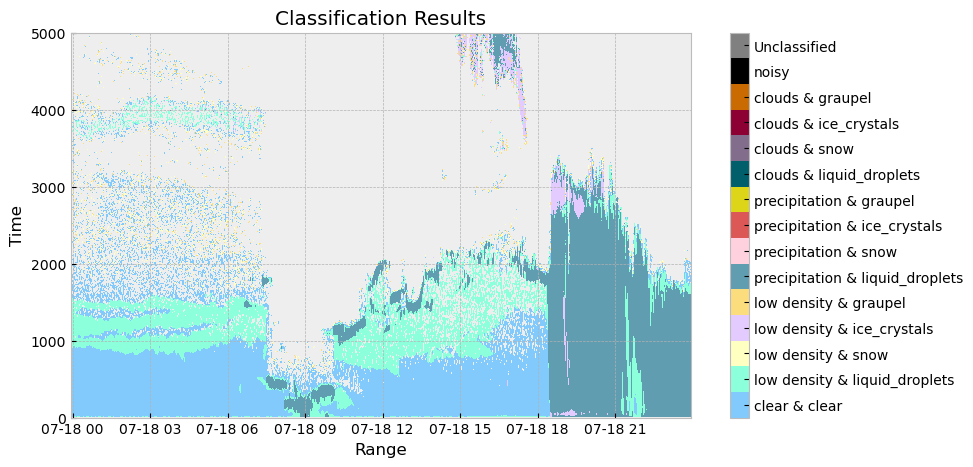

In [20]:
june18.process.classify_clusters()
june18.plot.plot_classes_colormesh()